In [2]:
import numpy as np
from numpy.random import randn 
from numpy.linalg import cholesky

Defining a kernel and GP:

In [16]:
def kernel (f) : return lambda a,b : np.array([ [np.float64(f(a[i],b[j])) for j in range(b.size) ] for i in range(a.size) ])

phi = lambda x : ((x+8.1)/10)**(3/2)
SE  = lambda a,b : ((1+(phi(a)-phi(b))**2)**-0.5)

# define the GP:
m   = lambda x : 0.0 * x   # mean function
k   = kernel(SE) 

Drawing samples:

In [17]:
n        = 100
X        = np.linspace(-8,8,n).reshape(n,1)
kXX      = k(X,X)
mX       = m(X)
samples  = cholesky(kXX + 1e-8 * np.eye(n)) @ randn(n,10**4) + mX
covariance = np.cov(samples)

plotting:

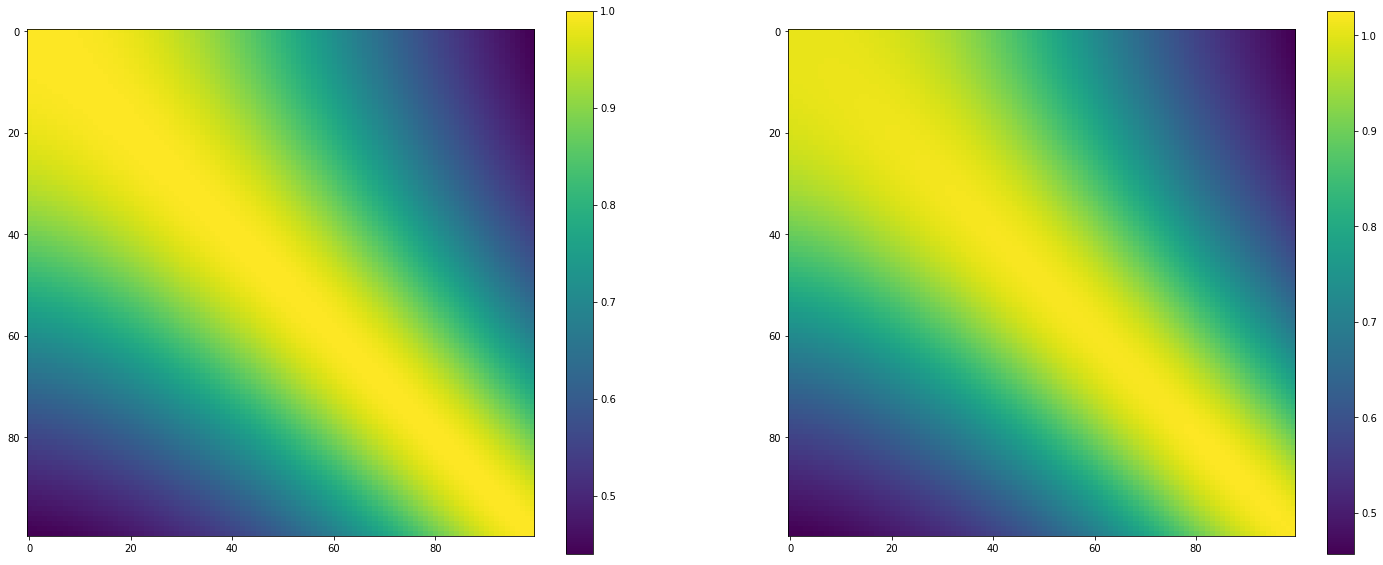

In [22]:
plt.subplot(121)  #sublot(Anzahl Zeilen Anzahl Spalten Bild Nummer)
plt.imshow(kXX);
plt.colorbar()
plt.subplot(122)
plt.imshow(covariance);
plt.colorbar()
plt.show()